<a href="https://colab.research.google.com/github/SaiKrishhna2001/Intro_to_ML_Assignment1/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Sai Krishna Goneti
Student ID : 801389081

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import StringIO
from matplotlib import markers


A function to retrieve data from a given URL.

In [7]:
def load_data(url):
    response = requests.get(url)
    data = pd.read_csv(StringIO(response.text))
    return data

Retrieving data from a GitHub URL.

In [8]:
# Load the data from the GitHub URL
github_url = "https://raw.githubusercontent.com/SaiKrishhna2001/Intro_to_ML_Assignment1/refs/heads/main/D3%20(2).csv"
data = load_data(github_url)
display(data)

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


Align column names with the variable names used in the code.

In [9]:
# Rename columns to match variable names in the code
data = data.rename(columns={'X1': 'x1', 'X2': 'x2', 'X3': 'x3', 'Y': 'y'})

# Extract individual explanatory variables
x1, x2, x3, y = data['x1'], data['x2'], data['x3'], data['y']

# Determine the number of data points
m = len(x1)
print(m)


100


Gradient Descent algorithm and Cost Function.

In [10]:
def optimize_parameters(X, Y, initial_theta, learning_rate, iterations):
    m = len(Y)  # Number of data points
    theta = initial_theta  # Initialize parameters
    cost_values = []  # Store cost function values

    for _ in range(iterations):
        predictions = X.dot(theta)  # Compute predictions
        error = predictions - Y  # Calculate error
        gradient = (X.T.dot(error) / m)  # Compute gradient
        theta -= learning_rate * gradient  # Update parameters
        cost = np.sum(error**2) / (2 * m)  # Compute cost function
        cost_values.append(cost)  # Store cost

    return theta, cost_values


Task 1 - Perform Linear Regression Separately for Each Explanatory Variable.

In [11]:
# Set learning rate and number of iterations
alpha = 0.01
iterations = 5000

# Initialize parameter vector with zeros
theta_initial = np.zeros(2)
print(theta_initial)


[0. 0.]


In [12]:
# Perform gradient descent for X1 as the explanatory variable
theta_x1, cost_x1 = optimize_parameters(np.column_stack((np.ones(len(x1)), x1)), y, theta_initial, alpha, iterations)

# Display the final parameter values and cost
print('Optimized theta for x1 and y:', theta_x1)
print('Final cost for x1 and y:', cost_x1)


Optimized theta for x1 and y: [ 5.92785998 -2.03830202]
Final cost for x1 and y: [5.524438459196242, 5.4822671506377505, 5.442909653150663, 5.4060408688278345, 5.37137434491193, 5.3386576750109604, 5.307668447592466, 5.278210676627332, 5.250111657004879, 5.223219194169255, 5.1973991634427845, 5.1725333598018395, 5.148517603539863, 5.125260071365583, 5.102679826108516, 5.080705521396407, 5.059274260482047, 5.038330590874891, 5.017825618615978, 4.997716227958004, 4.977964393906743, 4.958536576572887, 4.939403187598378, 4.920538120080047, 4.901918334434012, 4.883523493543612, 4.865335641325883, 4.847338919549531, 4.829519318352298, 4.811864456447284, 4.794363387485139, 4.77700642945939, 4.759785014412683, 4.742691556028028, 4.725719332976612, 4.708862386147121, 4.692115428104538, 4.675473763323111, 4.6589332179112555, 4.642490077698859, 4.626141033691764, 4.60988313401675, 4.5937137415845894, 4.577630496790692, 4.561631284653873, 4.545714205865046, 4.5298775512805785, 4.514119779450369, 4

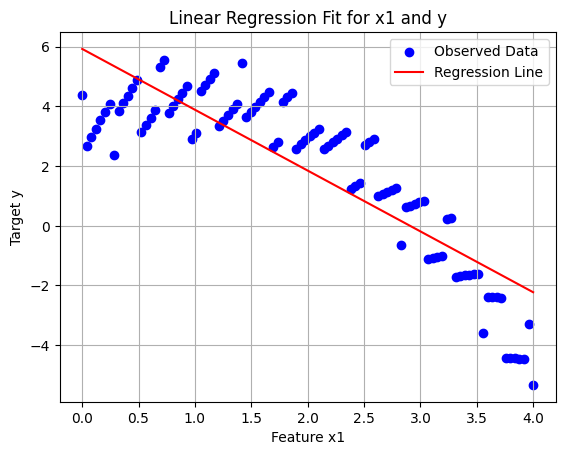

In [13]:
# Plot the actual data points
plt.scatter(x1, y, label='Observed Data', color='blue')

# Plot the fitted linear regression line
plt.plot(x1, np.column_stack((np.ones(len(x1)), x1)).dot(theta_x1), label='Regression Line', color='red')

# Customize plot appearance
plt.grid(linestyle='-')
plt.xlabel('Feature x1')
plt.ylabel('Target y')
plt.title('Linear Regression Fit for x1 and y')
plt.legend()
plt.show()


In [14]:
# Apply gradient descent using x2 as the explanatory variable
theta_x2, cost_x2 = optimize_parameters(np.column_stack((np.ones(len(x2)), x2)), y, theta_initial, alpha, iterations)

# Display the final parameters and cost history
print('Optimized theta for x2 and y:', theta_x2)
print('Cost history for x2 and y:', cost_x2)


Optimized theta for x2 and y: [0.73614253 0.55757565]
Cost history for x2 and y: [8.182403599005609, 8.06106499912682, 7.952288998482203, 7.854588904890693, 7.7666549119947215, 7.687333049267685, 7.615606637058188, 7.550579948561112, 7.491463816081973, 7.4375629502155425, 7.388264768094697, 7.3430295511238475, 7.301381773982686, 7.2629024655141965, 7.227222478698328, 7.194016561526374, 7.162998133465496, 7.13391468354518, 7.106543716090058, 7.080689178926858, 7.056178316649017, 7.032858898355365, 7.010596775298845, 6.989273729184631, 6.968785576529142, 6.949040498607592, 6.929957570144174, 6.911465463093597, 6.893501304677435, 6.876009671318252, 6.858941702299194, 6.84225431890111, 6.825909536465026, 6.809873858321421, 6.794117741843829, 6.778615128043658, 6.763343027144591, 6.7482811534747125, 6.733411603807417, 6.718718573980446, 6.704188109237838, 6.689807884281624, 6.675567009497678, 6.661455860240876, 6.647465926435459, 6.633589680072946, 6.619820458477773, 6.6061523614641935, 6.5

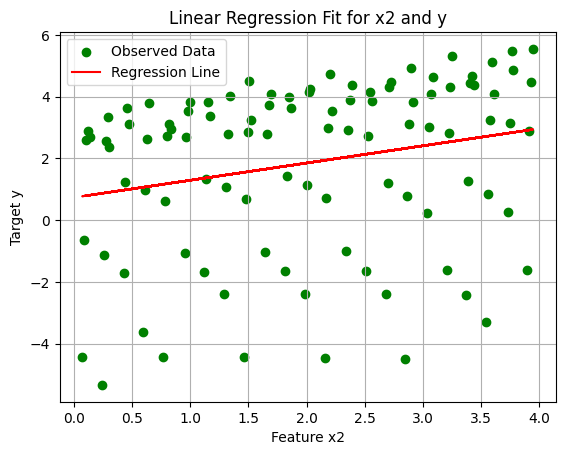

In [15]:
# Scatter plot of actual data points
plt.scatter(x2, y, label='Observed Data', color='green')

# Plot the fitted regression line
plt.plot(x2, np.column_stack((np.ones(len(x2)), x2)).dot(theta_x2), label='Regression Line', color='red')

# Customize plot appearance
plt.grid(linestyle='-')
plt.xlabel('Feature x2')
plt.ylabel('Target y')
plt.title('Linear Regression Fit for x2 and y')
plt.legend()
plt.show()


In [16]:
# Perform gradient descent using x3 as the explanatory variable
theta_x3, cost_x3 = optimize_parameters(np.column_stack((np.ones(len(x3)), x3)), y, theta_initial, alpha, iterations)

# Display the final parameter values and cost history
print('Optimized theta for x3 and y:', theta_x3)
print('Cost history for x3 and y:', cost_x3)


Optimized theta for x3 and y: [ 2.87139341 -0.52047154]
Cost history for x3 and y: [4.407830865792402, 4.388730216571164, 4.37151876055964, 4.3559795945141335, 4.341920876123181, 4.329172927762379, 4.317585674966053, 4.307026380932802, 4.29737764285249, 4.288535619796161, 4.280408465407324, 4.272914941725866, 4.265983193211204, 4.2595496624505955, 4.253558131178121, 4.247958872122314, 4.24270789887401, 4.237766302446318, 4.2330996645077645, 4.228677538427526, 4.224472990295785, 4.220462192987914, 4.216624067142235, 4.212939963629622, 4.209393382719736, 4.205969725702901, 4.202656075216733, 4.199441000960167, 4.19631438786084, 4.1932672841009335, 4.19029176670645, 4.187380822670117, 4.184528243812727, 4.181728533795153, 4.178976825876804, 4.17626881017858, 4.1736006693518535, 4.170969021682057, 4.168370870767622, 4.165803561014369, 4.163264738273279, 4.160752315027224, 4.158264439600913, 4.155799468929126, 4.153355944471995, 4.1509325709136276, 4.148528197322401, 4.14614180048845, 4.143

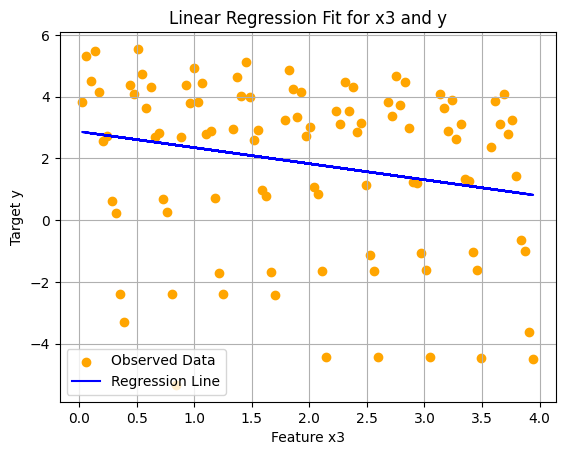

In [17]:
# Scatter plot of actual data points
plt.scatter(x3, y, label='Observed Data', color='orange')

# Plot the fitted regression line
plt.plot(x3, np.column_stack((np.ones(len(x3)), x3)).dot(theta_x3), label='Regression Line', color='blue')

# Customize plot appearance
plt.grid(linestyle='-')
plt.xlabel('Feature x3')
plt.ylabel('Target y')
plt.title('Linear Regression Fit for x3 and y')
plt.legend()
plt.show()


Using different learning rates for X1, X2, and X3 and visualizing the Loss Function  

The initial learning rate was set to 0.01.

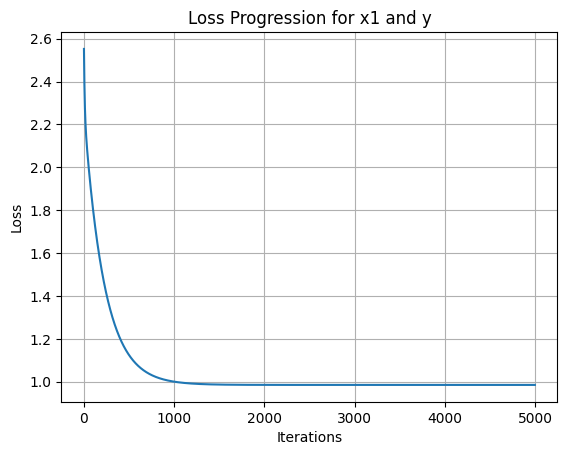

In [18]:
# Optimize parameters for x1 with the specified learning rate
theta_x1, loss_x1 = optimize_parameters(np.column_stack((np.ones(len(x1)), x1)), y, theta_initial, alpha, iterations)

# Plot the loss function over iterations
plt.plot(loss_x1)
plt.grid(linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Progression for x1 and y')
plt.show()


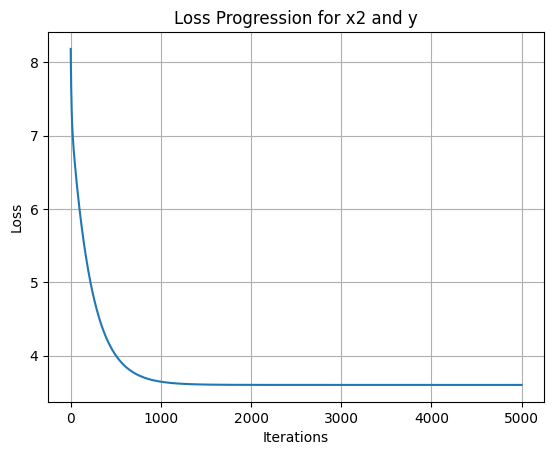

In [19]:
# Optimize parameters for x2 with the specified learning rate
theta_x2, loss_x2 = optimize_parameters(np.column_stack((np.ones(len(x2)), x2)), y, theta_initial, alpha, iterations)

# Plot the loss function over iterations
plt.plot(loss_x2)
plt.grid(linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Progression for x2 and y')
plt.show()


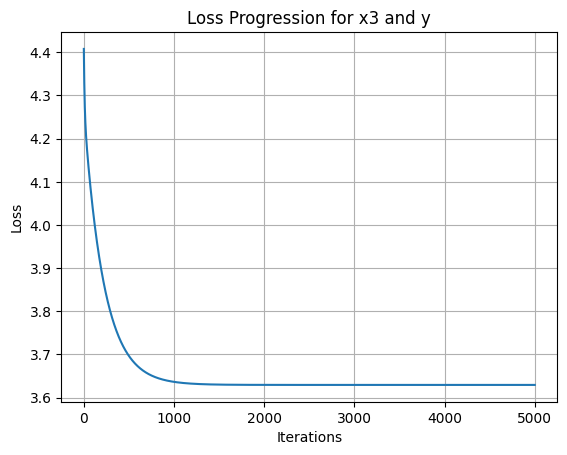

In [20]:
# Optimize parameters for x3 with the specified learning rate
theta_x3, loss_x3 = optimize_parameters(np.column_stack((np.ones(len(x3)), x3)), y, theta_initial, alpha, iterations)

# Plot the loss function over iterations
plt.plot(loss_x3)
plt.grid(linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Progression for x3 and y')
plt.show()


Now, setting the learning rate to 0.07

In [21]:
# Update learning rate and number of iterations
alpha = 0.07
iterations = 2000

# Initialize theta values to zero
theta_initial = np.zeros(2)
print(theta_initial)


[0. 0.]


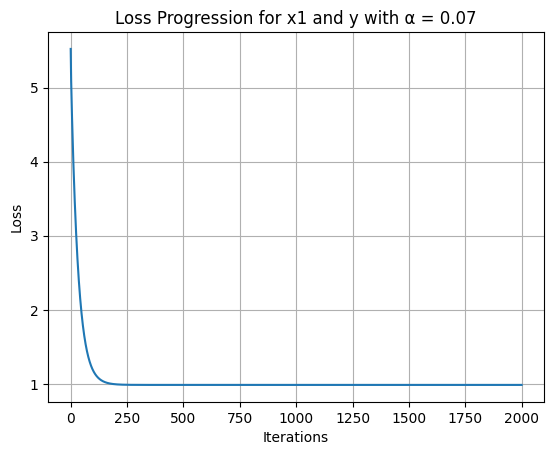

In [22]:
# Optimize parameters for x1 with the updated learning rate
theta_x1, loss_x1 = optimize_parameters(np.column_stack((np.ones(len(x1)), x1)), y, theta_initial, alpha, iterations)

# Plot the loss function over iterations
plt.plot(loss_x1)
plt.grid(linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Progression for x1 and y with α = 0.07')
plt.show()


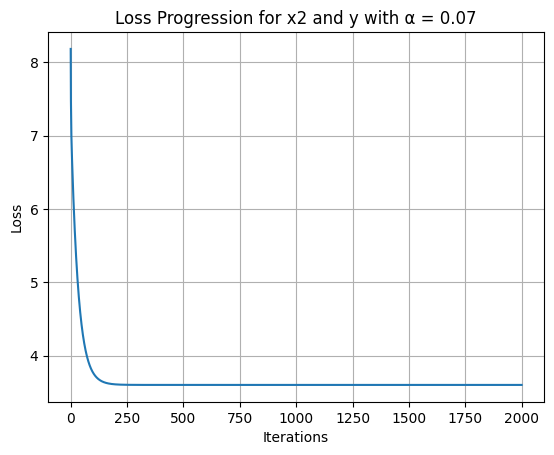

In [23]:
# Optimize parameters for x2 with the updated learning rate
theta_x2, loss_x2 = optimize_parameters(np.column_stack((np.ones(len(x2)), x2)), y, theta_initial, alpha, iterations)

# Plot the loss function over iterations
plt.plot(loss_x2)
plt.grid(linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Progression for x2 and y with α = 0.07')
plt.show()


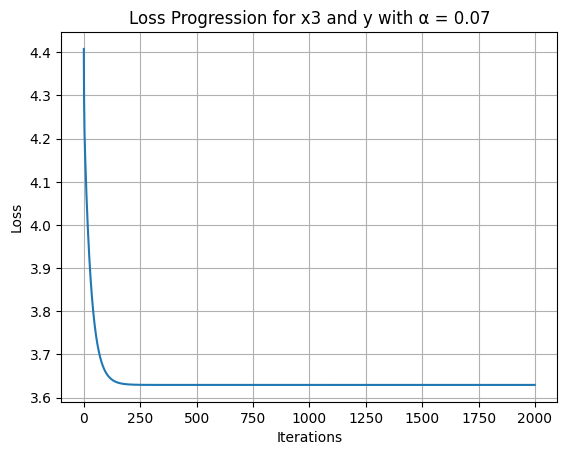

In [24]:
# Optimize parameters for x3 with the updated learning rate
theta_x3, loss_x3 = optimize_parameters(np.column_stack((np.ones(len(x3)), x3)), y, theta_initial, alpha, iterations)

# Plot the loss function over iterations
plt.plot(loss_x3)
plt.grid(linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Progression for x3 and y with α = 0.07')
plt.show()


Now, setting the learning rate to 0.09

In [25]:
# Set a new learning rate and number of iterations
alpha = 0.09
iterations = 1000

# Initialize theta values to zero
theta_initial = np.zeros(2)
print(theta_initial)


[0. 0.]


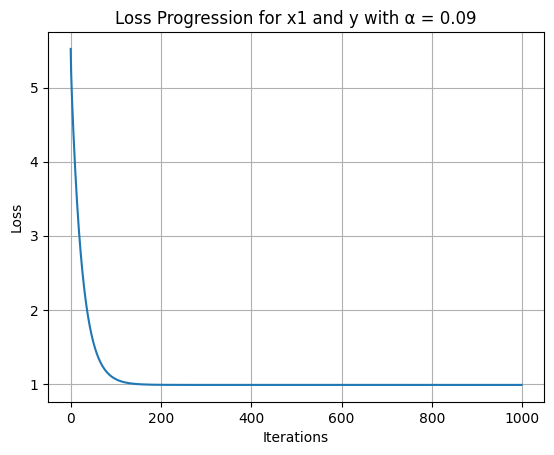

In [26]:
# Optimize parameters for x1 with the new learning rate
theta_x1, loss_x1 = optimize_parameters(np.column_stack((np.ones(len(x1)), x1)), y, theta_initial, alpha, iterations)

# Plot the loss function over iterations
plt.plot(loss_x1)
plt.grid(linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Progression for x1 and y with α = 0.09')
plt.show()


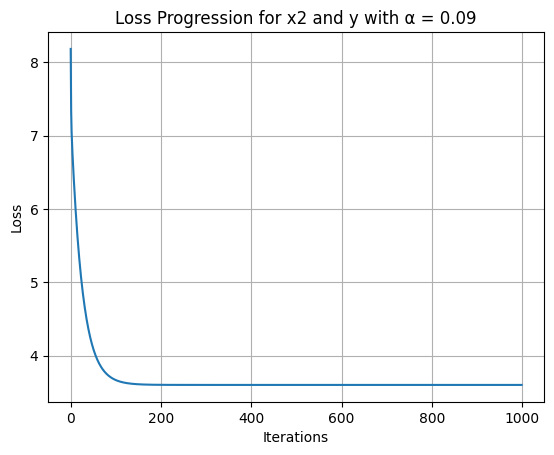

In [27]:
# Optimize parameters for x2 with the updated learning rate
theta_x2, loss_x2 = optimize_parameters(np.column_stack((np.ones(len(x2)), x2)), y, theta_initial, alpha, iterations)

# Plot the loss function over iterations
plt.plot(loss_x2)
plt.grid(linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Progression for x2 and y with α = 0.09')
plt.show()


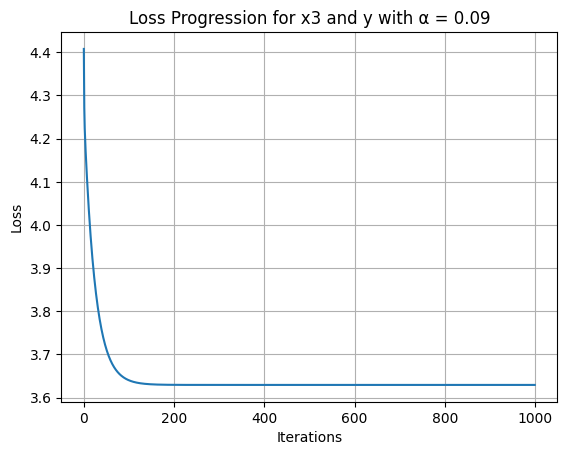

In [28]:
# Optimize parameters for x3 with the updated learning rate
theta_x3, loss_x3 = optimize_parameters(np.column_stack((np.ones(len(x3)), x3)), y, theta_initial, alpha, iterations)

# Plot the loss function over iterations
plt.plot(loss_x3)
plt.grid(linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Progression for x3 and y with α = 0.09')
plt.show()


Task 2 - Performing Linear Regression with All Explanatory Variables Combined.

Optimized theta for x1, x2, x3, and y: [ 5.30113037 -2.0018776   0.53471759 -0.26369094]


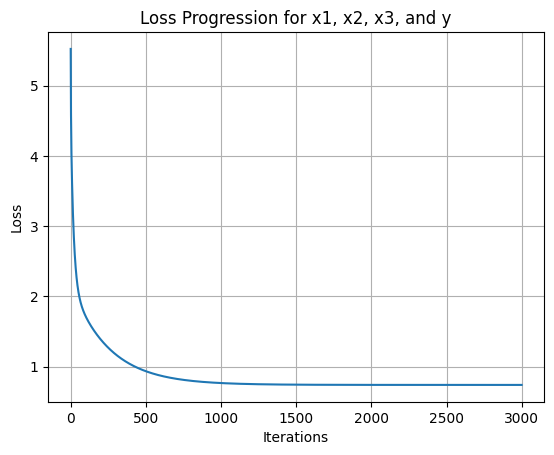

Predicted values for new inputs: [3.57027942 0.24261142 0.10124179]


In [29]:
# Set learning rate and number of iterations for multiple explanatory variables
alpha = 0.02
iterations = 3000

# Initialize theta values to zero for all variables
theta_initial = np.zeros(4)

# Combine all explanatory variables into a single feature matrix
X = np.column_stack((np.ones(len(x1)), x1, x2, x3))

# Perform gradient descent for multiple variables
theta_all, loss_all = optimize_parameters(X, y, theta_initial, alpha, iterations)

# Display the final parameter values
print('Optimized theta for x1, x2, x3, and y:', theta_all)

# Plot the loss function over iterations
plt.plot(loss_all)
plt.grid(linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Progression for x1, x2, x3, and y')
plt.show()

# Predict values for new data points
new_inputs = np.array([[1, 1, 1, 1], [1, 2, 0, 4], [1, 3, 2, 1]])
predicted_values = new_inputs.dot(theta_all)

# Display predictions
print("Predicted values for new inputs:", predicted_values)


In [30]:
# Update learning rate and number of iterations for multiple explanatory variables
alpha = 0.04
iterations = 1000

# Initialize theta values to zero for all variables
theta_initial = np.zeros(4)


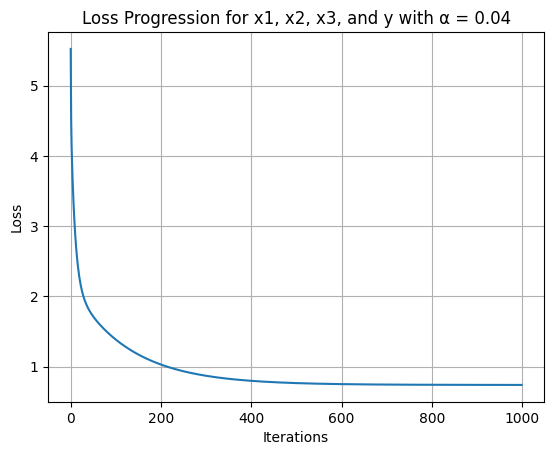

In [31]:
# Perform gradient descent for all explanatory variables with the updated learning rate
theta_all, loss_all = optimize_parameters(X, y, theta_initial, alpha, iterations)

# Plot the loss function over iterations
plt.plot(loss_all)
plt.grid(linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Progression for x1, x2, x3, and y with α = 0.04')
plt.show()


In [32]:
# Set a new learning rate and number of iterations for multiple explanatory variables
alpha = 0.06
iterations = 500

# Initialize theta values to zero for all variables
theta_initial = np.zeros(4)


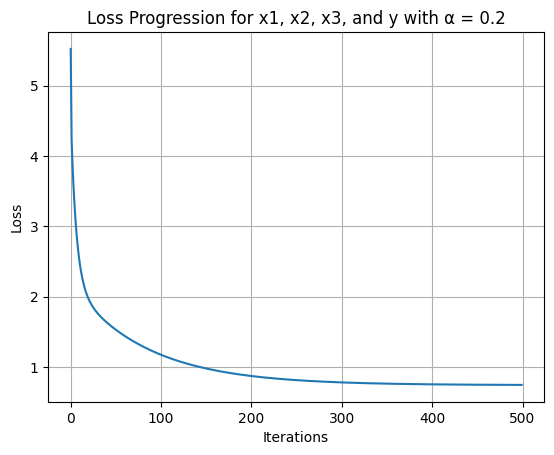

In [34]:
# Optimize parameters for all explanatory variables using the updated learning rate
theta_all, loss_all = optimize_parameters(X, y, theta_initial, alpha, iterations)

# Plot the loss function over iterations
plt.plot(loss_all)
plt.grid(linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Progression for x1, x2, x3, and y with α = 0.2')
plt.show()
